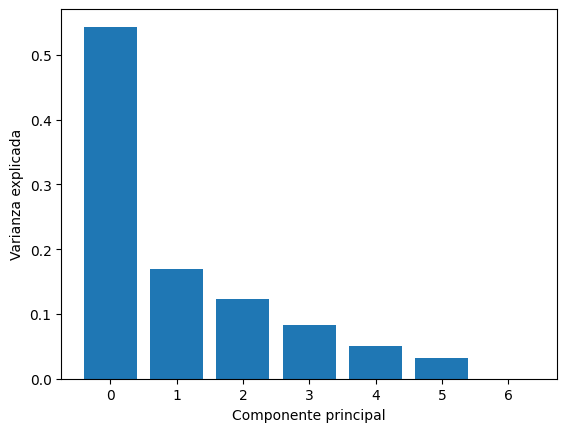

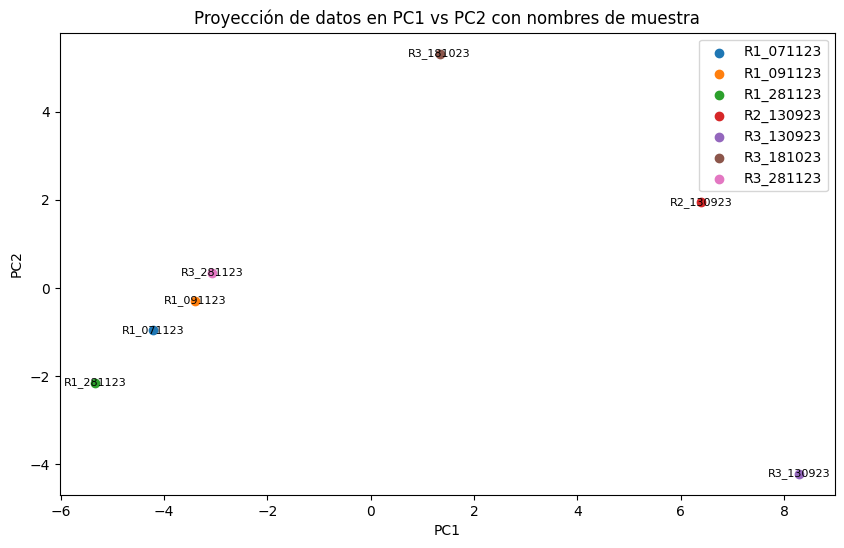

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Cargar los datos desde un archivo Excel
file_path = "/Users/valentinagirardi/Downloads/bioinformatica-todaslascarpetas/reactores2023/PCA.XLSX"
data = pd.read_excel(file_path)

# Establecer 'sample-id' como el índice del DataFrame
data.set_index('sample-id', inplace=True)

# Eliminar la columna 'type-of-reactor'
data.drop(columns=['type-of-reactor'], inplace=True)

# Escalar los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

# Aplicar PCA
pca = PCA()
pca.fit(scaled_data)

# Obtener los componentes principales
components = pca.components_

# Visualizar la varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
plt.bar(range(len(explained_variance_ratio)), explained_variance_ratio)
plt.xlabel('Componente principal')
plt.ylabel('Varianza explicada')
plt.show()

# Proyectar los datos en el espacio de los componentes principales
projected_data = pca.transform(scaled_data)

# Convertir los datos proyectados a un DataFrame
projected_df = pd.DataFrame(data=projected_data, columns=[f'PC{i}' for i in range(1, len(projected_data[0]) + 1)])

# Agregar la variable categórica 'type-of-reactor' a los datos proyectados
projected_df['type-of-reactor'] = data.index

# Visualizar los datos proyectados en un gráfico
plt.figure(figsize=(10, 6))
for reactor_type in projected_df['type-of-reactor'].unique():
    mask = projected_df['type-of-reactor'] == reactor_type
    plt.scatter(projected_df.loc[mask, 'PC1'], projected_df.loc[mask, 'PC2'], label=reactor_type)
    # Agregar nombres de muestra a los puntos
    for x, y, sample_id in zip(projected_df.loc[mask, 'PC1'], projected_df.loc[mask, 'PC2'], projected_df.loc[mask, 'type-of-reactor']):
        plt.text(x, y, sample_id, fontsize=8, ha='center', va='center', color='black')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('Proyección de datos en PC1 vs PC2 con nombres de muestra')
plt.show()

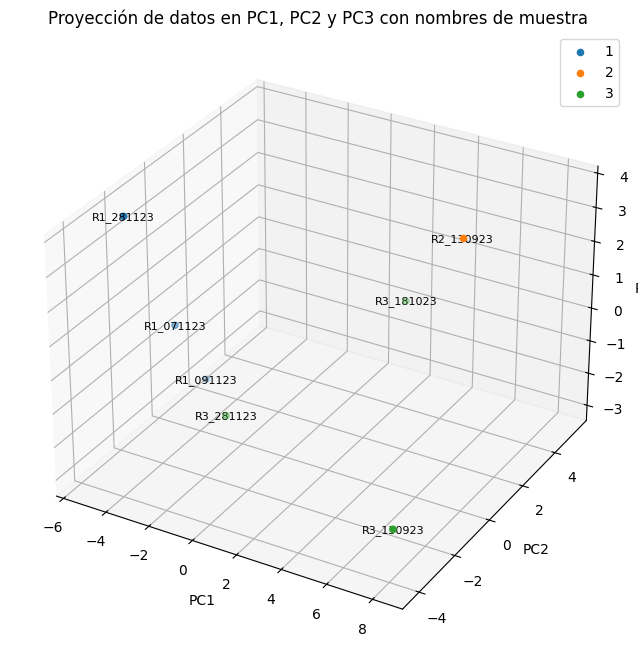

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

# Crear una figura 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Visualizar los datos proyectados en el espacio de los tres primeros componentes principales
for reactor_type in projected_df['type-of-reactor'].unique():
    mask = projected_df['type-of-reactor'] == reactor_type
    ax.scatter(projected_df.loc[mask, 'PC1'], projected_df.loc[mask, 'PC2'], projected_df.loc[mask, 'PC3'], label=reactor_type)
    # Agregar nombres de muestra a los puntos
    for x, y, z, sample_id in zip(projected_df.loc[mask, 'PC1'], projected_df.loc[mask, 'PC2'], projected_df.loc[mask, 'PC3'], data.loc[mask, 'sample-id']):
        ax.text(x, y, z, sample_id, fontsize=8, ha='center', va='center', color='black')

# Etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Leyenda y título
ax.legend()
plt.title('Proyección de datos en PC1, PC2 y PC3 con nombres de muestra')

# Mostrar el gráfico
plt.show()



In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Cargar los datos desde un archivo Excel
file_path = "/Users/valentinagirardi/Downloads/bioinformatica-todaslascarpetas/reactores2023/PCA.xlsx"
PCA_data = pd.read_excel(file_path)

# Extraer las variables numéricas para el PCA
numeric_data = PCA_data.drop(columns=['sample-id', 'type-of-reactor'])

# Escalar los datos numéricos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Realizar el PCA
pca = PCA()
pca.fit(scaled_data)

# Obtener la matriz de cargas
loadings_matrix = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=numeric_data.columns)

# Mostrar la matriz de cargas
print("Matriz de Cargas:")
print(loadings_matrix)


Matriz de Cargas:
                                            PC1       PC2       PC3       PC4  \
time                                  -0.190151 -0.012004 -0.048927 -0.020343   
pH                                     0.193195  0.004477  0.046523  0.007070   
S-2-concentration-(ppm)               -0.096385  0.104295  0.281620  0.212744   
SO4-2-concentration-(ppm)             -0.031997  0.271209 -0.048476  0.303166   
H2S-concentration-(ppm)               -0.099169  0.147154  0.190724  0.268211   
amount-of-Fe-added-(g)                -0.179092 -0.121779  0.017218 -0.074253   
S-input-per-day-(g)                   -0.176555  0.160288  0.002535 -0.008169   
CH4-(%)                                0.168587 -0.137876  0.041649  0.105145   
CO2-(%)                               -0.058903  0.271629  0.039237  0.275276   
vol-biogas-(L)                         0.065360  0.152125 -0.247734 -0.192698   
Methanosaeta                          -0.191740  0.010790 -0.087579  0.032163   
Methanobre

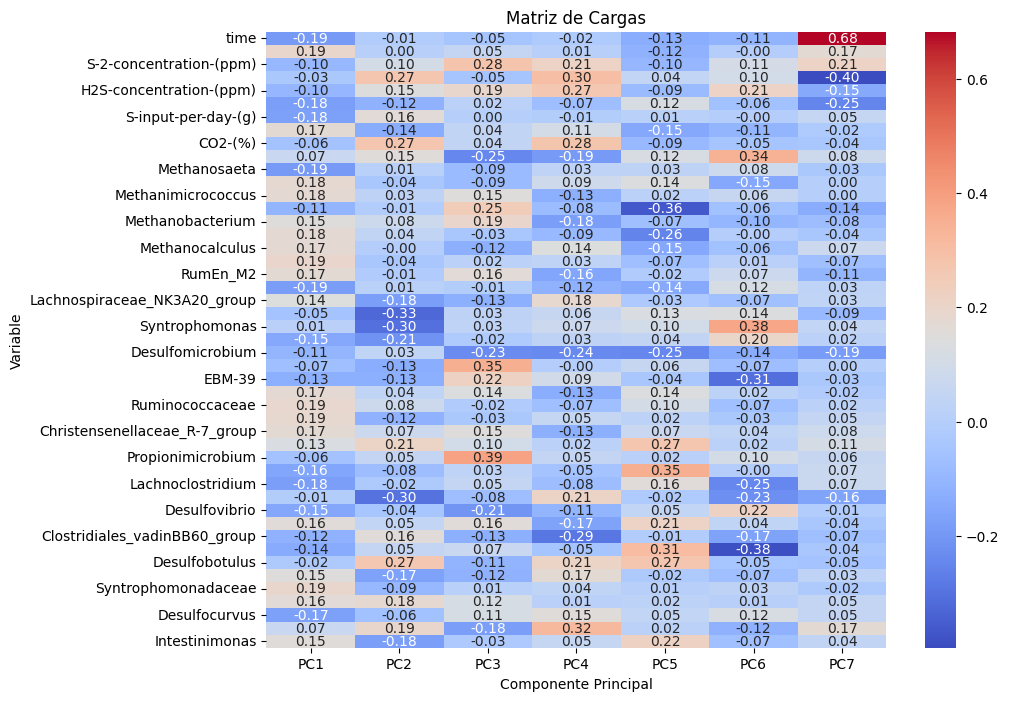

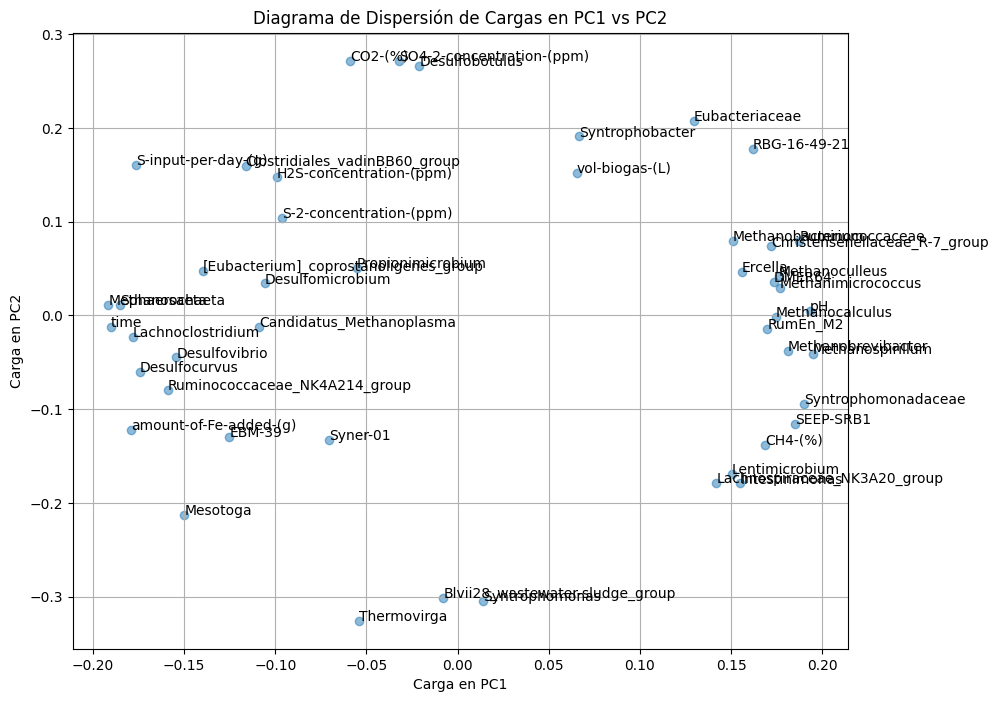

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Mapa de calor (heatmap)
plt.figure(figsize=(10, 8))
sns.heatmap(loadings_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Cargas')
plt.xlabel('Componente Principal')
plt.ylabel('Variable')
plt.show()

# Diagrama de dispersión
plt.figure(figsize=(10, 8))
plt.scatter(loadings_matrix['PC1'], loadings_matrix['PC2'], alpha=0.5)
plt.title('Diagrama de Dispersión de Cargas en PC1 vs PC2')
plt.xlabel('Carga en PC1')
plt.ylabel('Carga en PC2')
for i, txt in enumerate(loadings_matrix.index):
    plt.annotate(txt, (loadings_matrix['PC1'][i], loadings_matrix['PC2'][i]))
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


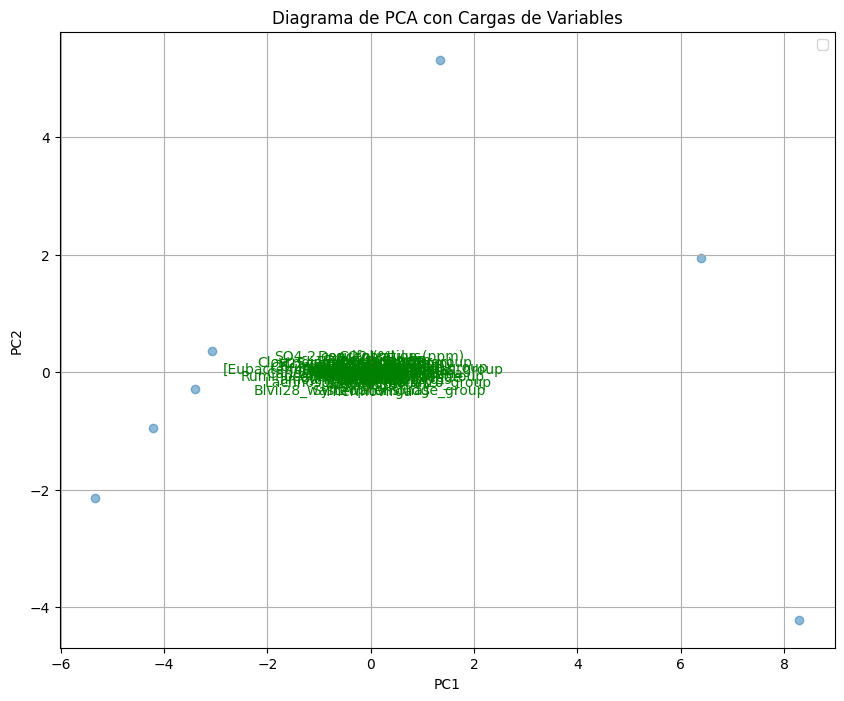

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Realizar el PCA
pca = PCA()
pca.fit(scaled_data)

# Obtener las coordenadas de cada individuo en el espacio de los componentes principales
projected_data = pca.transform(scaled_data)

# Crear el diagrama de dispersión de los individuos
plt.figure(figsize=(10, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)

# Superponer las flechas que representan las cargas de las variables
for i, (x, y) in enumerate(zip(pca.components_[0], pca.components_[1])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5)
    plt.text(x, y, numeric_data.columns[i], color='g', ha='center', va='center')

# Etiquetas de los ejes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Leyenda y título
plt.legend()
plt.title('Diagrama de PCA con Cargas de Variables')
plt.grid(True)
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


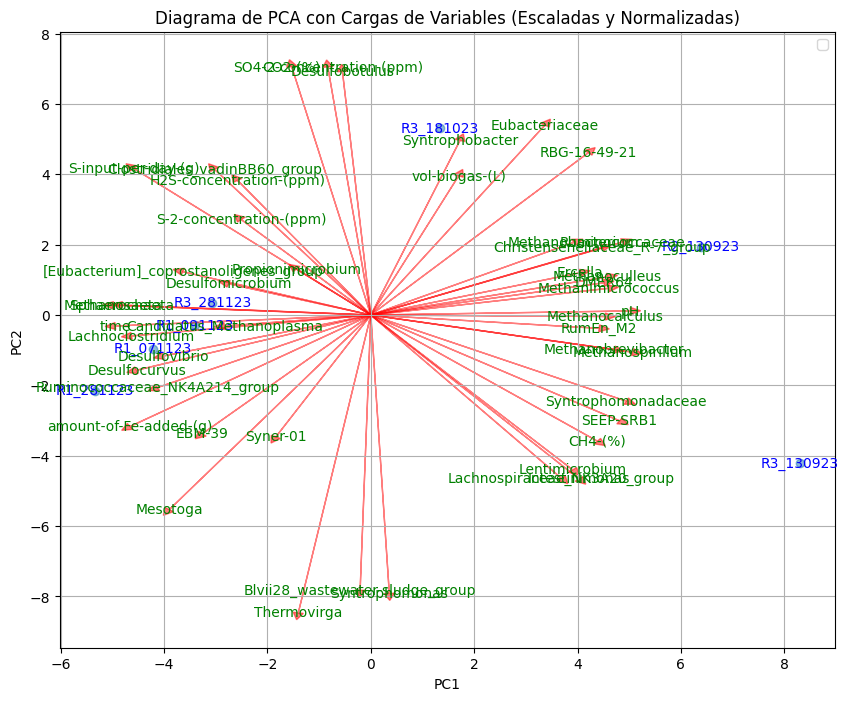

In [15]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA  # Importar la clase PCA

# Realizar el PCA
pca = PCA()
pca.fit(scaled_data)

# Obtener las coordenadas de cada individuo en el espacio de los componentes principales
projected_data = pca.transform(scaled_data)

# Obtener las cargas de las variables y normalizarlas
loadings = pca.components_.T
loadings_normalized = loadings / np.linalg.norm(loadings, axis=0)

# Escalar las cargas de las variables para que sean visibles en el gráfico
loadings_scaled = loadings_normalized * 26  # Aumentar el factor de escala

# Crear el diagrama de dispersión de los individuos
plt.figure(figsize=(10, 8))
plt.scatter(projected_data[:, 0], projected_data[:, 1], alpha=0.5)

# Etiquetar los puntos del PCA con el nombre de las muestras
for i, sample_id in enumerate(PCA_data['sample-id']):  # Utilizar PCA_data en lugar de PCA
    plt.text(projected_data[i, 0], projected_data[i, 1], sample_id, color='b', ha='center', va='center')

# Superponer las flechas que representan las cargas de las variables
for i, (x, y) in enumerate(zip(loadings_scaled[:, 0], loadings_scaled[:, 1])):
    plt.arrow(0, 0, x, y, color='r', alpha=0.5, head_width=0.2, head_length=0.2)  # Aumentar el tamaño de las flechas
    plt.text(x, y, numeric_data.columns[i], color='g', ha='center', va='center')

# Etiquetas de los ejes
plt.xlabel('PC1')
plt.ylabel('PC2')

# Leyenda y título
plt.legend()
plt.title('Diagrama de PCA con Cargas de Variables (Escaladas y Normalizadas)')
plt.grid(True)
plt.show()



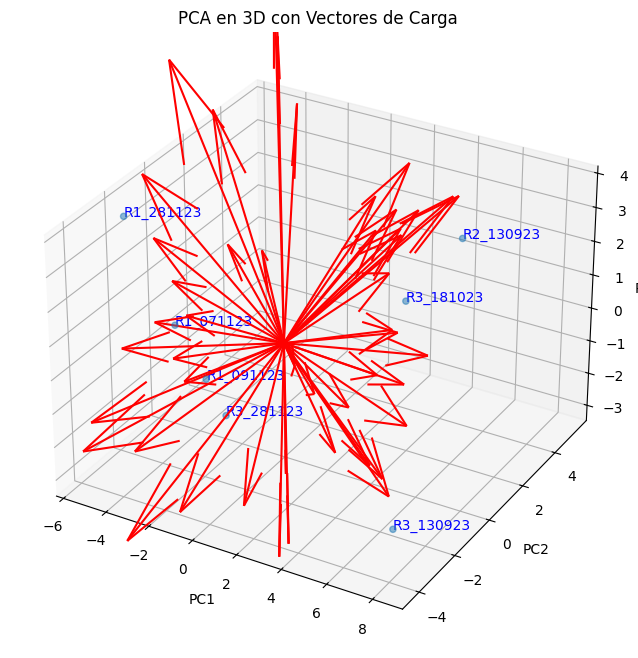

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from sklearn.decomposition import PCA

# Realizar el PCA
pca = PCA(n_components=3)
pca.fit(scaled_data)
projected_data_3d = pca.transform(scaled_data)

# Obtener las cargas de las variables y normalizarlas
loadings = pca.components_.T
loadings_normalized = loadings / np.linalg.norm(loadings, axis=0)

# Escalar las cargas de las variables para que sean visibles en el gráfico 3D
loadings_scaled = loadings_normalized * 26  # Aumentar el factor de escala

# Crear la figura y el eje 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot en 3D
ax.scatter(projected_data_3d[:, 0], projected_data_3d[:, 1], projected_data_3d[:, 2], alpha=0.5)

# Etiquetar los puntos del PCA con el nombre de las muestras
for i, sample_id in enumerate(PCA_data['sample-id']):
    ax.text(projected_data_3d[i, 0], projected_data_3d[i, 1], projected_data_3d[i, 2], sample_id, color='b')

# Superponer los vectores que representan las cargas de las variables
for i, (x, y, z) in enumerate(zip(loadings_scaled[:, 0], loadings_scaled[:, 1], loadings_scaled[:, 2])):
    ax.quiver(0, 0, 0, x, y, z, color='r')

# Etiquetas de los ejes
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

# Título
plt.title('PCA en 3D con Vectores de Carga')

plt.show()
